<a href="https://colab.research.google.com/github/tfysekis/Data-Mining/blob/master/Mining_Knowledge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercise 1. Transformation and analysis of raw data**

We download the contect of the .csv file that we are working on (GroceriesInitial.csv)

In [1]:
!gdown --id 1qklC6HBqynRmhn5q-zY3Ov2a0jcCwT9s

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1qklC6HBqynRmhn5q-zY3Ov2a0jcCwT9s
To: /content/GroceriesInitial.csv
100% 823k/823k [00:00<00:00, 88.3MB/s]


Now we are storing the data with the help of the pandas library so we can manage them.

In [16]:
import pandas as pd 

data = pd.read_csv('GroceriesInitial.csv', delimiter=',', header='infer')

Now that we have the data into a DataFrame we can start,this a quick glimpse of the data to check if it was properly loaded into the DataFrame

In [17]:
data.head()

,id,basket_value,recency_days,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,...,Item_23,Item_24,Item_25,Item_26,Item_27,Item_28,Item_29,Item_30,Item_31,Item_32
0,1,1.1,2,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3.6,31,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1.2,7,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,6.6,7,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2.5,66,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A descriptive statistics summary for the basket_value column.

In [18]:
data['basket_value'].describe()

count    7536.000000
mean        5.036584
std         3.692088
min         1.100000
25%         2.200000
50%         4.100000
75%         7.000000
max        25.100000
Name: basket_value, dtype: float64

Now we are going to visual our data for the basket_value,in general,a reasonable number of bins for a histogram is the square root of the number of observations in the dataset.We have aroud 7.500 items in our case, the square root of 7500 is approximately 87, so we could start by using 87 bins in our histogram.

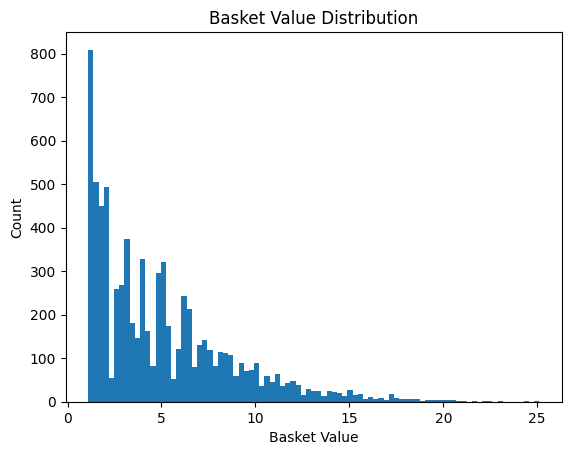

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(data['basket_value'], bins=87)
plt.title('Basket Value Distribution')
plt.xlabel('Basket Value')
plt.ylabel('Count')
plt.show()

The histogram of the 'basket_value' variable shows a skewed right distribution, which indicates that there are relatively few high-value purchases that are driving up the overall average basket value.In this case, the histogram shows that there are a small number of customers who are making large purchases, while the majority of customers are making smaller purchases.This is reflected in the long tail stretching out to the right of the histogram, which indicates that there are relatively few high-value purchases compared to the number of low to medium-value purchases.

Now we are going for the box plot visualisation:

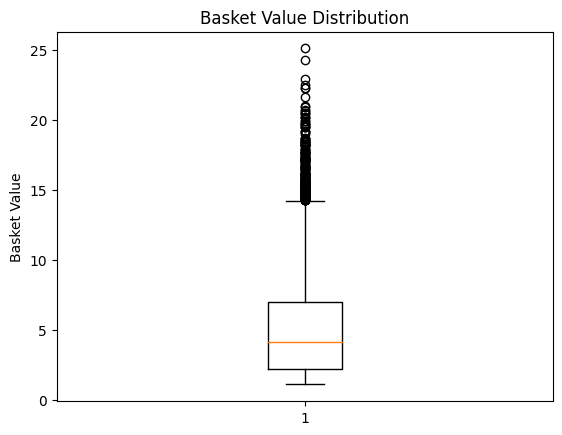

In [20]:
plt.boxplot(data['basket_value'])
plt.title('Basket Value Distribution')
plt.ylabel('Basket Value')
plt.show()

The box represents the middle 50% of the data,based on this plot, we can see that the 'basket_value' variable is positively skewed, with a long tail of high values that fall outside of the range of the rest of the data. The median value is relatively low compared to the range of values in the data, which is a common characteristic of positively skewed data.

There are several outliers (represented by the dots outside the whiskers) that fall far outside of the range of the rest of the data.


**Together, these two plots suggest that the majority of customers have relatively low basket values, but there are a few customers with very high basket values that are driving up the overall distribution.**

Now we want to study certain products in our data.So we will replace the Item columns with the products that we want.Also we will make binary values,if the costumers bought the product is equal to 1.

In [21]:

# Define the items to keep
items_to_keep = ['citrus fruit', 'tropical fruit', 'whole milk', 'other vegetables', 'rolls/buns', 'chocolate', 'bottled water', 'yogurt', 'sausage', 'root vegetables', 'pastry', 'soda', 'cream']

# Insert new columns for each item in items_to_keep
for item in items_to_keep:
    data[item] = data.apply(lambda row: 1 if item in str(row.values) else 0, axis=1)
data.head()


,id,basket_value,recency_days,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,...,other vegetables,rolls/buns,chocolate,bottled water,yogurt,sausage,root vegetables,pastry,soda,cream
0,1,1.1,2,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,2,3.6,31,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
2,3,1.2,7,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,4,6.6,7,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
4,5,2.5,66,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0


Now are going to delete the Item columns because we dont need them anymore and print thre results.

In [22]:
# Drop the Item columns
data.drop(columns=[f'Item_{i}' for i in range(1, 33)], inplace=True)
data.head()

,id,basket_value,recency_days,citrus fruit,tropical fruit,whole milk,other vegetables,rolls/buns,chocolate,bottled water,yogurt,sausage,root vegetables,pastry,soda,cream
0,1,1.1,2,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2,3.6,31,0,1,0,0,0,0,0,1,0,0,0,0,0
2,3,1.2,7,0,0,1,0,0,0,0,0,0,0,0,0,0
3,4,6.6,7,0,0,0,0,0,0,0,1,0,0,0,0,1
4,5,2.5,66,0,0,1,1,0,0,0,0,0,0,0,0,0


We are going to change the basket_value into 3 new types, low_value_basket, medium_value_basket and high_value_basket.

**low_value_basket**:if the basket_value column is less than half of the average value 

**medium_value_basket**: if the value in the basket_value column is greater than or equal to half of the average value but less than the average value itself.


**high_value_basket**:if the value in the basket_value column is greater than or equal to the average value.

In [23]:
# Calculate average basket value
avg_basket_value = data['basket_value'].mean()

# Create new column for basket category
data.insert(2, 'basket_category', '')

# Loop through rows and assign basket category based on basket value
for i, row in data.iterrows():
    if row['basket_value'] < avg_basket_value/2:
        data.at[i, 'basket_category'] = 'low_value_basket'
    elif row['basket_value'] >= avg_basket_value/2 and row['basket_value'] < avg_basket_value*2:
        data.at[i, 'basket_category'] = 'medium_value_basket'
    else:
        data.at[i, 'basket_category'] = 'high_value_basket'

# Drop original basket value column
data.drop(columns=['basket_value'], inplace=True)

data.head()

,id,basket_category,recency_days,citrus fruit,tropical fruit,whole milk,other vegetables,rolls/buns,chocolate,bottled water,yogurt,sausage,root vegetables,pastry,soda,cream
0,1,low_value_basket,2,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2,medium_value_basket,31,0,1,0,0,0,0,0,1,0,0,0,0,0
2,3,low_value_basket,7,0,0,1,0,0,0,0,0,0,0,0,0,0
3,4,medium_value_basket,7,0,0,0,0,0,0,0,1,0,0,0,0,1
4,5,low_value_basket,66,0,0,1,1,0,0,0,0,0,0,0,0,0


Visualization of our data with histogram for the basket_category.Also heatmaps can be especially useful when working with large datasets, as they can quickly reveal relationships and trends that might be difficult to see otherwise.So our binary data will be seen with heatmap.


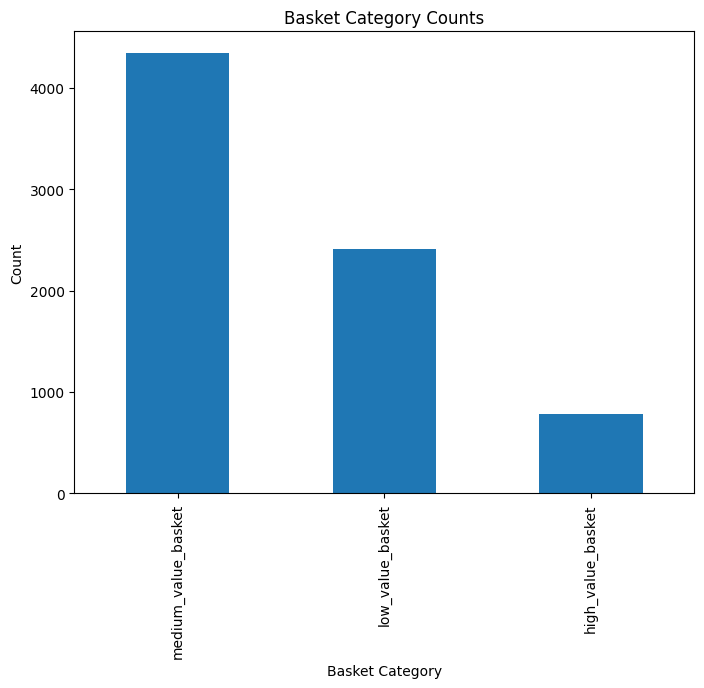

In [24]:
# Get counts of each basket category
category_counts = data['basket_category'].value_counts()

# Create bar chart
category_counts.plot(kind='bar', figsize=(8,6))
plt.xlabel('Basket Category')
plt.ylabel('Count')
plt.title('Basket Category Counts')
plt.show()

<Axes: >

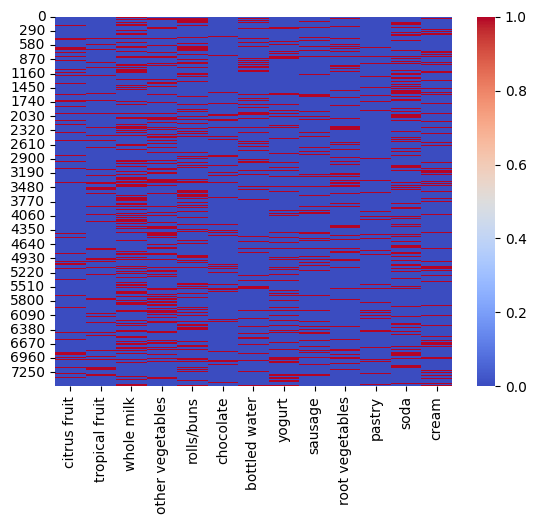

In [25]:
import seaborn as sns
# Heatmap 

# Select only the item columns
item_cols = data.columns[3:]

# Create a new DataFrame with only the item columns
binary_data_items = data[item_cols]

# Create a heatmap of the binary data
sns.heatmap(binary_data_items, cmap='coolwarm', cbar=True)

**The histograms showed that most customers are buying medium_value_basket portions, while a smaller number of customers are making larger purchases. The heatmap also showed that with our biary data, there are very few customers who buy all of the products in our dataset, while most customers only buy a small number of items.**

# **Exercise 2. Learning association rules with the Apriori method**

## a) We are going to use the Apriori method with various parameters for the minimum support

This is the apriori algorithm for the scratch.

In [100]:
from collections import defaultdict
from itertools import chain, combinations

In [101]:
def apriori(itemSetList, minSup, minConf):
    C1ItemSet = getItemSetFromList(itemSetList)
    # Final result, global frequent itemset
    globalFreqItemSet = dict()
    # Storing global itemset with support count
    globalItemSetWithSup = defaultdict(int)

    L1ItemSet = getAboveMinSup(C1ItemSet, itemSetList, minSup, globalItemSetWithSup)
    currentLSet = L1ItemSet
    k = 2

    # Calculating frequent item set
    while(currentLSet):
        # Storing frequent itemset
        globalFreqItemSet[k-1] = currentLSet
        # Self-joining Lk
        candidateSet = getUnion(currentLSet, k)
        # Perform subset testing and remove pruned supersets
        candidateSet = pruning(candidateSet, currentLSet, k-1)
        # Scanning itemSet for counting support
        currentLSet = getAboveMinSup(candidateSet, itemSetList, minSup, globalItemSetWithSup)
        k += 1

    rules = associationRule(globalFreqItemSet, globalItemSetWithSup, minConf,itemSetList)
    rules.sort(key=lambda x: x[2])


    return  rules

In [102]:
def getUnion(itemSet, length):
    return set([i.union(j) for i in itemSet for j in itemSet if len(i.union(j)) == length])

In [103]:
def pruning(candidateSet, prevFreqSet, length):
    tempCandidateSet = candidateSet.copy()
    for item in candidateSet:
        subsets = combinations(item, length)
        for subset in subsets:
            # if the subset is not in previous K-frequent get, then remove the set
            if(frozenset(subset) not in prevFreqSet):
                tempCandidateSet.remove(item)
                break
    return tempCandidateSet

In [104]:
def getAboveMinSup(itemSet, itemSetList, minSup, globalItemSetWithSup):
    freqItemSet = set()
    localItemSetWithSup = defaultdict(int)

    for item in itemSet:
        for itemSet in itemSetList:
            if item.issubset(itemSet):
                globalItemSetWithSup[item] += 1
                localItemSetWithSup[item] += 1

    for item, supCount in localItemSetWithSup.items():
        support = float(supCount / len(itemSetList))
        if(support >= minSup):
            freqItemSet.add(item)

    return freqItemSet

In [105]:
def associationRule(freqItemSet, itemSetWithSup, minConf,itemSetList):
    rules = []
    for k, itemSet in freqItemSet.items():
        for item in itemSet:
            subsets = powerset(item)
            for s in subsets:
                confidence = float(itemSetWithSup[item] / itemSetWithSup[frozenset(s)])
                support = float(itemSetWithSup[item] / len(itemSetList))
                if(confidence > minConf):
                    rules.append([set(s), set(item.difference(s)), support,confidence])
    return rules


In [106]:
def getItemSetFromList(itemSetList):
    tempItemSet = set()

    for itemSet in itemSetList:
        for item in itemSet:
            tempItemSet.add(frozenset([item]))

    return tempItemSet

In [107]:
def powerset(s):
    return chain.from_iterable(combinations(s, r) for r in range(1, len(s)))

We are going to define the transactions to use the algorithm

In [108]:
#Empty list
transactions = []

# Loop through each row in the data frame
for index, row in data.iterrows():
    # Create a list to store the products bought by this customer
    products = []
    # Loop through each of the product columns (Bread, Tost, Milk, Cake, etc.)
    for col in data.columns[3:]:
        # Check if the value is 1 (meaning the customer bought the product)
        if row[col] == 1:
            # Add the product name to the list of products for this customer
            products.append(col)
    # Add the list of products for this customer to the list of transactions
    transactions.append(products)

transactions

[['citrus fruit'],
 ['tropical fruit', 'yogurt'],
 ['whole milk'],
 ['yogurt', 'cream'],
 ['whole milk', 'other vegetables'],
 ['whole milk', 'yogurt'],
 ['rolls/buns'],
 ['other vegetables', 'rolls/buns'],
 ['whole milk'],
 ['tropical fruit', 'other vegetables', 'chocolate', 'bottled water'],
 ['citrus fruit', 'tropical fruit', 'whole milk', 'bottled water', 'yogurt'],
 ['rolls/buns', 'soda'],
 ['tropical fruit'],
 ['chocolate'],
 ['other vegetables'],
 ['pastry'],
 ['whole milk'],
 ['tropical fruit', 'cream'],
 ['tropical fruit', 'other vegetables', 'rolls/buns', 'root vegetables'],
 ['bottled water'],
 ['yogurt'],
 ['rolls/buns', 'chocolate', 'sausage', 'soda'],
 ['other vegetables'],
 ['soda'],
 ['bottled water', 'yogurt'],
 ['other vegetables', 'rolls/buns', 'bottled water'],
 ['whole milk', 'other vegetables', 'root vegetables'],
 ['whole milk', 'other vegetables', 'soda', 'cream'],
 ['pastry', 'soda'],
 ['whole milk', 'other vegetables', 'root vegetables'],
 ['citrus fruit'],
 [

Testing the algorithm

In [109]:
from tabulate import tabulate

# Run the Apriori algorithm with support value 0.03
rules = apriori(transactions,0.03,0.2)

#rules
df = pd.DataFrame(rules, columns=['Left_Hand_Side', 'Right_Hand_Side','Support','Confidence'])

# Set the index to start from 1
df.index = df.index + 1

#This will print our DataFrame in a pretty SQL-like format
print(tabulate(df, headers='keys', tablefmt='psql'))

+----+-----------------------------------------+------------------------------------+-----------+--------------+
|    | Left_Hand_Side                          | Right_Hand_Side                    |   Support |   Confidence |
|----+-----------------------------------------+------------------------------------+-----------+--------------|
|  1 | {'root vegetables'}                     | {'other vegetables', 'whole milk'} | 0.0302548 |     0.212687 |
|  2 | {'root vegetables', 'other vegetables'} | {'whole milk'}                     | 0.0302548 |     0.48927  |
|  3 | {'root vegetables', 'whole milk'}       | {'other vegetables'}               | 0.0302548 |     0.474012 |
|  4 | {'other vegetables', 'whole milk'}      | {'root vegetables'}                | 0.0302548 |     0.309783 |
|  5 | {'bottled water'}                       | {'rolls/buns'}                     | 0.0315817 |     0.218951 |
|  6 | {'root vegetables'}                     | {'rolls/buns'}                     | 0.0317144 

In [110]:
# Run the Apriori algorithm with support value 0.003
rules = apriori(transactions,0.003,0.2) 
df = pd.DataFrame(rules, columns=['Left_Hand_Side', 'Right_Hand_Side','Support','Confidence'])

# Set the index to start from 1
df.index = df.index + 1

#This will print our DataFrame in a pretty SQL-like format
print(tabulate(df, headers='keys', tablefmt='psql'))


+------+---------------------------------------------------------------------------+-----------------------------------------+------------+--------------+
|      | Left_Hand_Side                                                            | Right_Hand_Side                         |    Support |   Confidence |
|------+---------------------------------------------------------------------------+-----------------------------------------+------------+--------------|
|    1 | {'sausage', 'chocolate'}                                                  | {'yogurt'}                              | 0.00305202 |     0.239583 |
|    2 | {'root vegetables', 'pastry'}                                             | {'tropical fruit'}                      | 0.00305202 |     0.212963 |
|    3 | {'root vegetables', 'bottled water', 'yogurt'}                            | {'whole milk'}                          | 0.00305202 |     0.605263 |
|    4 | {'bottled water', 'whole milk', 'yogurt'}                    

The Apriori algorithm was run with different values of minimum support.The minimum support parameter is the threshold for the frequency of occurrence of an itemset.

1. **For the minimum support 0.03**, the algorithm generated 47 rules.This means that there are 47 associations or patterns of items that frequently appear together in the transactions, and that satisfy the minimum support threshold of 0.3.

2. **For the minimum support was set to 0.003**, the number of rules icreased to 1185. This indicates that more associations meet the higher threshold of minimum support.



## b) We will find the 20 highest confidence rules exclusively for products.

Once we confirmed the Apriori algorithm is functioning correctly, we will proceed to identify the top 20 highest-confidence association rules among the products.For the previous example, a confidence level of 0.2 was used.

Now we are going to keep only the 20 with the higher confidence.

In [111]:
# Run the Apriori algorithm with support value 0.03 and confidence at 0.2
rules = apriori(transactions, 0.03, 0.2)
df = pd.DataFrame(rules, columns=['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence'])

# Sort by Confidence in descending order and take the top 20 rules
top_20 = df.sort_values(by='Confidence', ascending=False).head(20)

# Set the index to start from 1
top_20.index = top_20.index + 1

# Print the top 20 rules
print(tabulate(top_20, headers='keys', tablefmt='psql'))

+----+-----------------------------------------+----------------------+-----------+--------------+
|    | Left_Hand_Side                          | Right_Hand_Side      |   Support |   Confidence |
|----+-----------------------------------------+----------------------+-----------+--------------|
|  2 | {'root vegetables', 'other vegetables'} | {'whole milk'}       | 0.0302548 |     0.48927  |
|  3 | {'root vegetables', 'whole milk'}       | {'other vegetables'} | 0.0302548 |     0.474012 |
| 40 | {'root vegetables'}                     | {'whole milk'}       | 0.063827  |     0.448694 |
| 38 | {'root vegetables'}                     | {'other vegetables'} | 0.0618365 |     0.434701 |
| 31 | {'tropical fruit'}                      | {'whole milk'}       | 0.0552017 |     0.403101 |
| 43 | {'yogurt'}                              | {'whole milk'}       | 0.0731157 |     0.401603 |
| 41 | {'cream'}                               | {'whole milk'}       | 0.0646231 |     0.388357 |
| 46 | {'o

Here we have the 20 top  rules for high cofidence products with support at 0.03.

## c) Finding the 20 most trusted rules for products and the discretized basket value


We are going to put the Basket_category into the transacts.

In [112]:
# Empty list
transacts = []

# Loop through each row in the data frame
for index, row in data.iterrows():
    # Create a list to store the products bought by this customer
    products = []
    # Loop through each of the product columns (Bread, Tost, Milk, Cake, etc.)
    for col in data.columns[3:]:
        # Check if the value is 1 (meaning the customer bought the product)
        if row[col] == 1:
            # Add the product name to the list of products for this customer
            products.append(col)
    # Add the basket category to the list of products for this customer
    products.append(row[1])
    # Add the list of products for this customer to the list of transactions
    transacts.append(products)

transacts

[['citrus fruit', 'low_value_basket'],
 ['tropical fruit', 'yogurt', 'medium_value_basket'],
 ['whole milk', 'low_value_basket'],
 ['yogurt', 'cream', 'medium_value_basket'],
 ['whole milk', 'other vegetables', 'low_value_basket'],
 ['whole milk', 'yogurt', 'medium_value_basket'],
 ['rolls/buns', 'low_value_basket'],
 ['other vegetables', 'rolls/buns', 'medium_value_basket'],
 ['whole milk', 'low_value_basket'],
 ['tropical fruit',
  'other vegetables',
  'chocolate',
  'bottled water',
  'medium_value_basket'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'bottled water',
  'yogurt',
  'medium_value_basket'],
 ['rolls/buns', 'soda', 'medium_value_basket'],
 ['tropical fruit', 'low_value_basket'],
 ['chocolate', 'medium_value_basket'],
 ['other vegetables', 'low_value_basket'],
 ['pastry', 'medium_value_basket'],
 ['whole milk', 'low_value_basket'],
 ['tropical fruit', 'cream', 'medium_value_basket'],
 ['tropical fruit',
  'other vegetables',
  'rolls/buns',
  'root vegetabl

Now that is completed we can find the 20 most trusted rules for products and the discretized basket value.

In [114]:
# Run the Apriori algorithm with support value 0.03 and confidence at 0.2
rules = apriori(transacts, 0.03, 0.2)
df = pd.DataFrame(rules, columns=['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence'])

# Sort by Confidence in descending order and take the top 20 rules
top_20 = df.sort_values(by='Confidence', ascending=False).head(20)

# Set the index to start from 1
top_20.index = top_20.index + 1

# Print the top 20 rules
print(tabulate(top_20, headers='keys', tablefmt='psql'))

+-----+-------------------------------------------+-------------------------+-----------+--------------+
|     | Left_Hand_Side                            | Right_Hand_Side         |   Support |   Confidence |
|-----+-------------------------------------------+-------------------------+-----------+--------------|
| 121 | {'chocolate'}                             | {'medium_value_basket'} | 0.0809448 |     0.721893 |
|  10 | {'bottled water', 'whole milk'}           | {'medium_value_basket'} | 0.0311837 |     0.695266 |
|  86 | {'rolls/buns', 'whole milk'}              | {'medium_value_basket'} | 0.0509554 |     0.689408 |
| 120 | {'pastry'}                                | {'medium_value_basket'} | 0.079087  |     0.681143 |
|  65 | {'root vegetables', 'whole milk'}         | {'medium_value_basket'} | 0.0421975 |     0.661123 |
| 124 | {'root vegetables'}                       | {'medium_value_basket'} | 0.0936837 |     0.658582 |
|  35 | {'whole milk', 'soda'}                    | {'m

Based on the results, we can see that **in most cases**, customers are buying products with a medium-value basket. However, we can also see that one product, cream, has a connection with high-value baskets. Therefore, it is **highly likely** that cream is the most expensive product.

## d) Association rules conclusion

Upon reviewing the association rules, it becomes evident that the majority of customers tend to purchase products that fall within the medium-value basket range. This observation is consistent with the initial summary we produced in Exercise 1, as indicated by the histogram.

# Exercise 3. Grouping transactions using k-means method